In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
u_cols = ['user_id','age','gender','occupation','zipcode']
users = pd.read_csv("movieLens/u.user",sep = "|", names = u_cols,encoding='latin-1')

r_cols = ["user_id","movie_id","rating","timestamp"]
ratings = pd.read_csv("movieLens/u.data",sep = "\t" , names = r_cols , encoding="latin-1")

m_cols = ["movie_id","title","release_date","video_release_date","IMDb URL","unknown", "Action" , "Adventure" , "Animation" ,
              "Children", "Comedy" , "Crime" , "Documentary" , "Drama" , "Fantasy" ,
              "Film-Noir" , "Horror" , "Musical", "Mystery" , "Romance" , "Sci-Fi" ,
              "Thriller" , "War" , "Western" ]

movies = pd.read_csv("movieLens/u.item",sep = "|",names = m_cols,encoding="latin-1")

movie_ratings = pd.merge(movies,ratings)
data = pd.merge(users,movie_ratings)
data.head()

,user_id,age,gender,occupation,zipcode,movie_id,title,release_date,video_release_date,IMDb URL,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating,timestamp
0,1,24,M,technician,85711,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,...,0,0,0,0,0,0,0,0,5,874965758
1,1,24,M,technician,85711,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,...,0,0,0,0,0,1,0,0,3,876893171
2,1,24,M,technician,85711,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,...,0,0,0,0,0,1,0,0,4,878542960
3,1,24,M,technician,85711,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,...,0,0,0,0,0,0,0,0,3,876893119
4,1,24,M,technician,85711,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),...,0,0,0,0,0,1,0,0,3,889751712


In [3]:
n_users = data.user_id.nunique()
n_features = len(data.columns) -1 
gender = data.groupby("gender").user_id.nunique()
n_male = gender.M
n_femal = gender.F
mean_rating = data.rating.mean()
std_dev = data.rating.std()

print("Total number of users {}".format(n_users))
print("Total number of features {}".format(n_features))
print("Number of Male users {}".format(n_male))
print("Number of female users {}".format(n_femal))
print("Mean rating {} ".format(mean_rating))
print("Standard deviation of ratings is {}".format(std_dev))

Total number of users 943
Total number of features 30
Number of Male users 670
Number of female users 273
Mean rating 3.52986 
Standard deviation of ratings is 1.12567359914


In [4]:
most_rated = data.groupby("title").size().sort_values(ascending=False)[:10] #most rated 500 movies

#print(most_rated)
print(most_rated)
title_rating = data.groupby("title").agg({"rating":[np.size,np.mean]})
atleast100 = title_rating["rating"]["size"] >= 100
top_rated = title_rating[atleast100].sort_values([("rating","mean")] , ascending = False)[:10] #top 10 rated movies
print(top_rated)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
dtype: int64
                                 rating          
                                   size      mean
title                                            
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230
Rear Window (1954)                  209  4.387560
Usual Suspects, The (1995)          267  4.385768
Star Wars (1977)                    583  4.358491
12 Angry Men (1957)                 125  4.344000
Citizen Kan

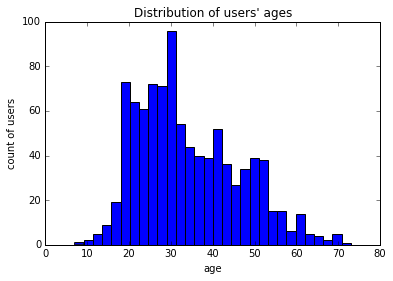

In [5]:
plt = users.age.plot.hist(bins = 30)
plt.set_title("Distribution of users' ages")
plt.set_ylabel('count of users')
plt.set_xlabel('age');

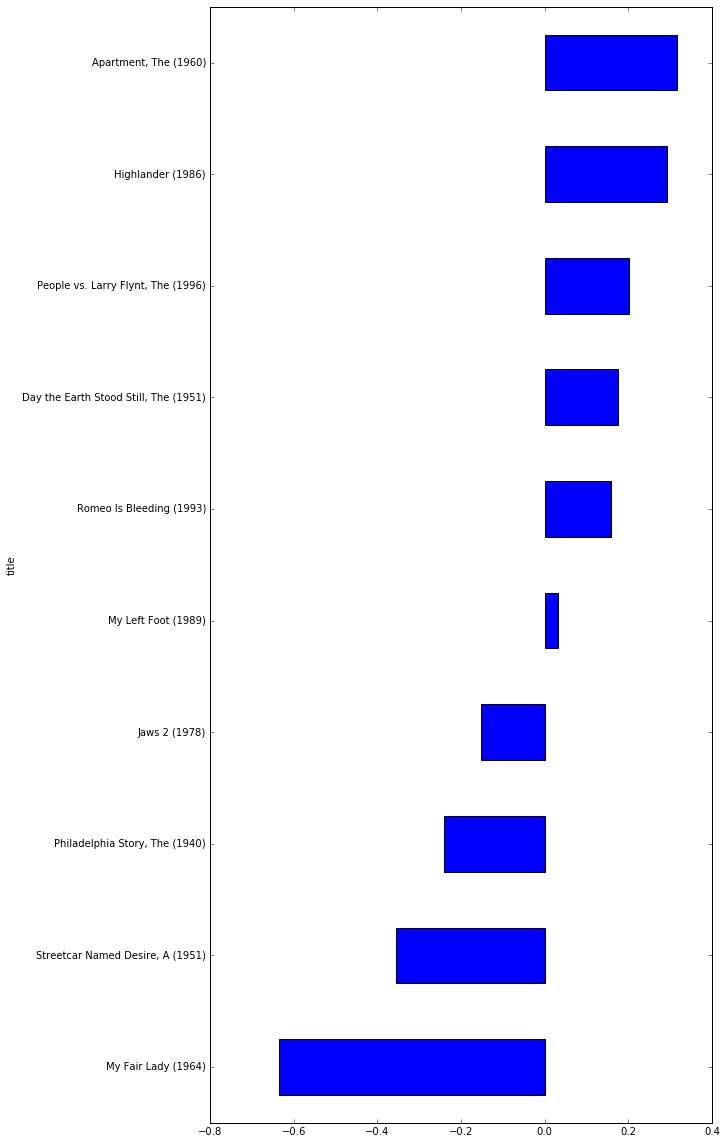

In [6]:
pivoted = data.pivot_table(index=["movie_id","title"],columns=["gender"],values="rating",fill_value=0)
pivoted["diff"]=pivoted.M-pivoted.F
pivoted.reset_index("movie_id",inplace=True)
disagreements = pivoted[pivoted.movie_id.isin(most_rated)]["diff"]
#pivoted.head()
disagreements.sort_values().plot(kind="barh",figsize=[9,20])

plt.set_title("Male vs. Female Avg. Ratings for top 100 movies")
plt.set_ylabel('Title')

In [7]:
most_rated = data.groupby('movie_id').size().sort_values(ascending=False)[:500] #most rated 500 movies
disagreements = pivoted[pivoted.movie_id.isin(most_rated)]["diff"]
male_choices = disagreements[disagreements>0]
female_choices = disagreements[disagreements<0]
male_choicesDF = pd.DataFrame(male_choices,columns=["diff"])
female_choicesDF = pd.DataFrame(female_choices,columns=["diff"])
male_choicesDF.reset_index("title",inplace=True)
female_choicesDF.reset_index("title",inplace=True)

flag = 0 
dict = defaultdict(int)
for i,val in enumerate(male_choicesDF.title):
    for j,val2 in enumerate(movies.title):
        if val == val2 and flag == 0:
            mov = data.loc[data["title"] == val2]
           


In [8]:
def get_genre(df):
    dict = defaultdict(int)
    for i,val in enumerate(df.title):
        for j,val2 in enumerate(movies.title):
            if val == val2:
                mov = data.loc[data["title"] == val2]
                for col in mov.columns[11:29]:
                    rating = mov[col].values[0]
                    if rating == 1:
                        dict[col] = dict[col] + 1

    return dict
                
male_categories  = get_genre(male_choicesDF)
female_categories =  get_genre(female_choicesDF)

male_dataframe = pd.DataFrame(male_categories.items(),columns=["genre","no"])
male_dataframe.set_index("genre",inplace=True)

In [9]:
female_dataframe = pd.DataFrame(female_categories.items(),columns=["genre","no"])
female_dataframe.set_index("genre",inplace=True)

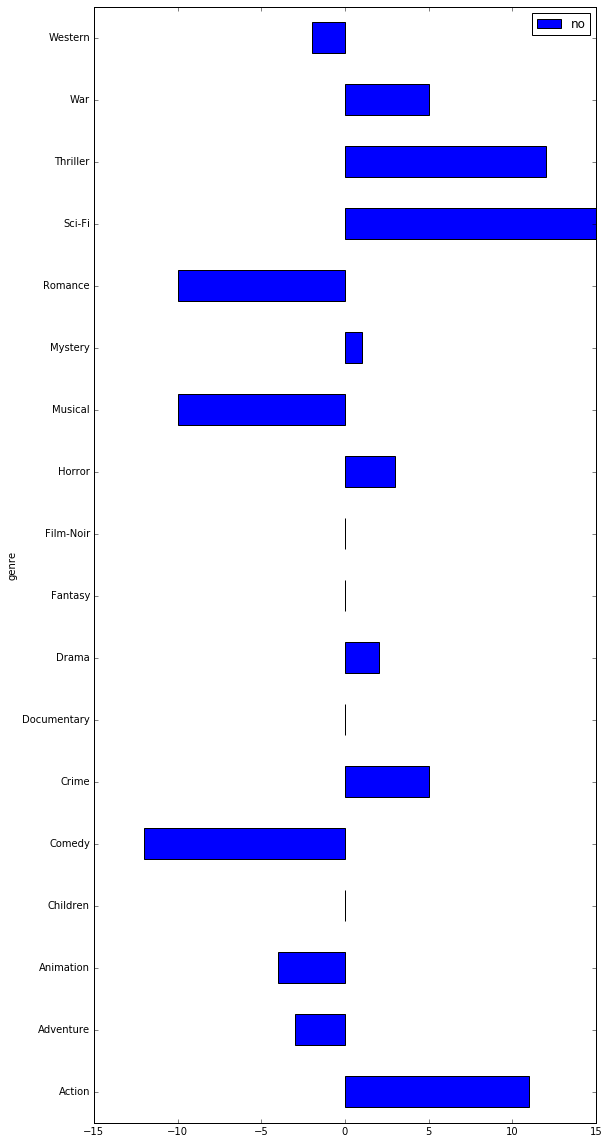

In [10]:
df = male_dataframe-female_dataframe
df.plot(kind="barh",figsize=[9,20])
plt.set_title("Male vs. Female Movie Genres")

In [11]:
train = data.ix[:,["user_id","movie_id","rating"]]
import operator 
from pearson_similarity import pearson_sim 
from prediction import predict

In [24]:
from math import floor
from sklearn.metrics import accuracy_score , mean_squared_error

def evaluate(data,sim):
    y_true = data.rating.values
    y_pred = []
    for index,val in data.iterrows():
        pred = predict(train,val["user_id"],val["movie_id"],sim) #predicted rating
        pred = round(pred) #round to the neares integer
        y_pred.append(pred) #append to predictions array which will be used for evaluation
    score_acc = accuracy_score(y_true,y_pred) 
    score_rmse = mean_squared_error(y_true,y_pred)
    print ("accuracy score {}".format(score_acc))
    print ("RMSE {}".format(score_rmse))
    print ("-----------")
    return (score_acc,score_rmse)


In [37]:
for sim in np.arange(0,1.1,0.1):
    evaluate(train[:500],sim) # evaluate our model for different similarity thresholds ranging from 0 to 1

accuracy score 0.412
RMSE 0.91
-----------
accuracy score 0.414
RMSE 0.902
-----------
accuracy score 0.42
RMSE 0.864
-----------
accuracy score 0.43
RMSE 0.872
-----------
accuracy score 0.434
RMSE 0.986
-----------
accuracy score 0.45
RMSE 1.418
-----------
accuracy score 0.328
RMSE 4.442
-----------
accuracy score 0.28
RMSE 6.674
-----------
accuracy score 0.176
RMSE 9.434
-----------
accuracy score 0.116
RMSE 11.49
-----------
accuracy score 0.0
RMSE 13.746
-----------


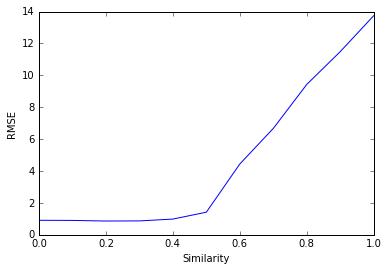

In [35]:
x = np.arange(0,1.1,0.1)
y = [0.91,0.902,0.864,0.872,0.986,1.418,4.442,6.674,9.434,11.49,13.746]
plt.xlabel("Similarity")
plt.ylabel("RMSE")
plt.plot(x, y)
plt.show()

In [41]:
evaluate(train[:20000],0.2) # evaluate our model with 0.2 similarity

accuracy score 0.4827
RMSE 0.7809
-----------


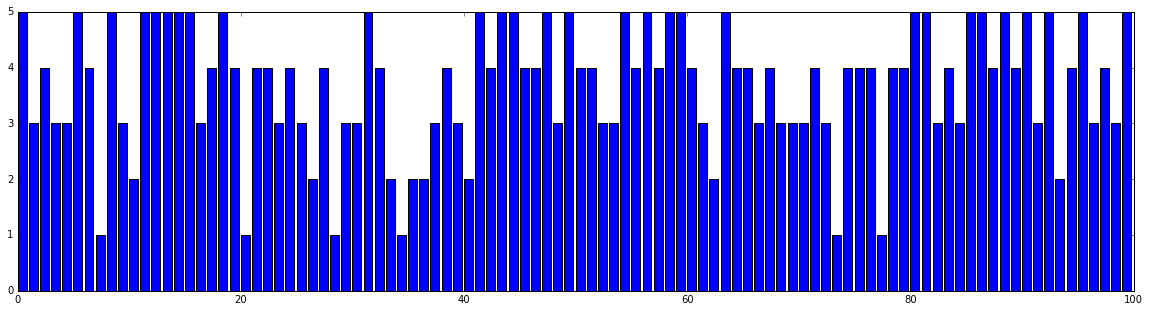

In [43]:
import matplotlib.pyplot as plt

x = range(100)
plt.figure(figsize=(20,5))
plt.bar(x,y_true[:100])
plt.show()

<function matplotlib.pyplot.show>

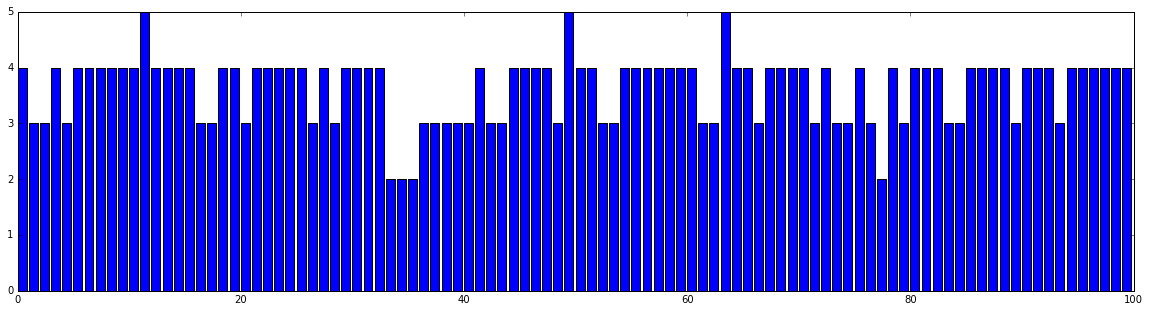

In [17]:
plt.figure(figsize=(20,5))
plt.bar(x,y_pred[:100])
plt.show

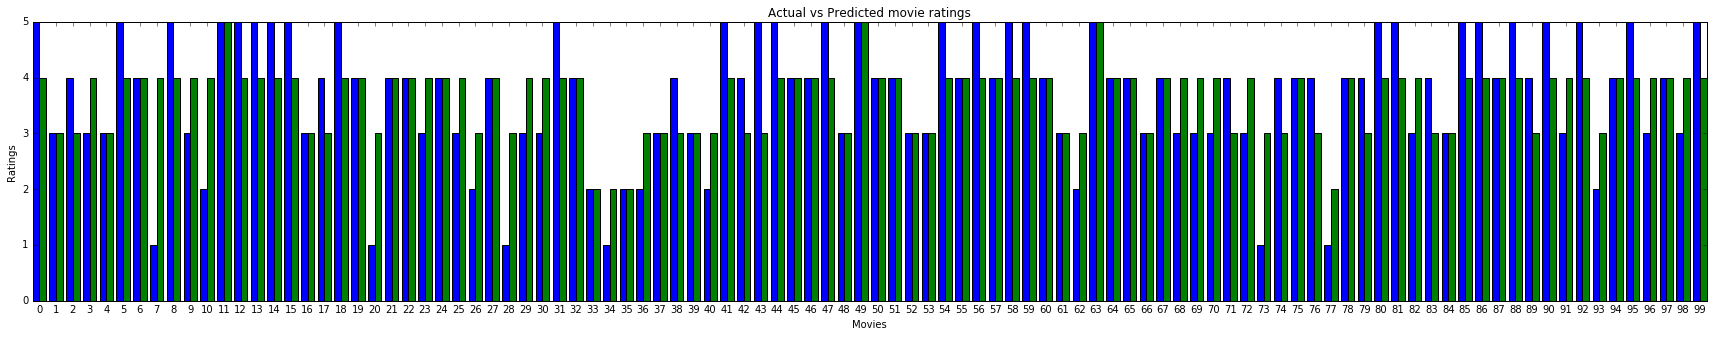

In [18]:
x = np.arange(100)

fig, ax = plt.subplots(figsize=(30,5))
bar_width = 0.4

plt.xlabel('Movies')
plt.ylabel('Ratings')
plt.title('Actual vs Predicted movie ratings')
plt.xticks(x + bar_width,x)
rects1 = plt.bar(x,y_true[:100],bar_width,
                 color='b',label="Actual")

rects2 = plt.bar(x + bar_width,y_pred[:100], bar_width,
                 color='g',label="predicted")


In [105]:
#Trying our model on Movie lens testing data     
r_cols = ["user_id","movie_id","rating","timestamp"]
test1 = pd.read_csv("movieLens/u1.test",sep = "\t" , names = r_cols , encoding="latin-1")
evaluate(test1,0)

accuracy score 0.4724
RMSE 0.79245


In [52]:
from random import randint,choice

subset = train[:20000]
x = len(subset.drop_duplicates("user_id").user_id.values)
fake_users = [int(x *0.03) ,int(x*0.06),int(x*0.09), int(x*0.12)]
output = {}

for i in range(len(fake_users)):
    #evaluate our data for each attack profile number
    number_movies = len(subset.drop_duplicates("movie_id").movie_id.values) #number of movies without duplicates
    fake_movies_num = int(round(number_movies * .03)) #number of filler items
    current_user = max(subset.drop_duplicates("user_id").user_id.values) + 1 # our first attack profile ID 
    
    users_num = fake_users[i]
    fake_data = []
    for user in range(current_user, users_num+current_user ):
        random_movieid = most_rated[:10].index[randint(0,9)] #random movie picked from most rated movies
        fake_data.append([user,random_movieid,5])
        for i in range(fake_movies_num):
            movie_id = choice(subset.drop_duplicates("movie_id").movie_id.values) #choose a random movie as a filler item
            tmp = [user,movie_id,randint(1,5)] # user - movie - random rating
            fake_data.append(tmp)

    df = pd.DataFrame(fake_data,columns=["user_id","movie_id","rating"]) #a dataframe of our newly created false data
    subset = subset.append(df,ignore_index=True) #our old data + our newly created false data
    output[i] = evaluate(subset,0.2)
                

accuracy score 0.479026845638
RMSE 0.810402684564
-----------
accuracy score 0.471816083109
RMSE 0.863168526356
-----------
accuracy score 0.46140659748
RMSE 0.951445515196
-----------
accuracy score 0.44933745583
RMSE 1.05618374558
-----------


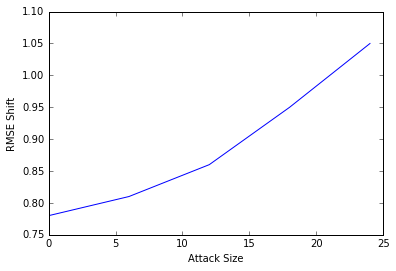

[6, 12, 18, 24]


In [58]:
x = [0]
x.extend(fake_users)
y = [0.78,0.81,0.86,0.95,1.05]
plt.xlabel("Attack Size")
plt.ylabel("RMSE Shift")
plt.plot(x, y)
plt.show()
print fake_users

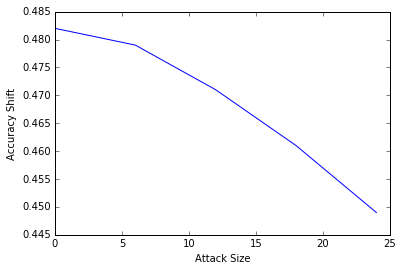

In [55]:
y = [0.482,0.479,0.471,0.461,0.449]
plt.xlabel("Attack Size")
plt.ylabel("Accuracy Shift")
plt.plot(x,y)
plt.show()